In [4]:
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.applications.vgg16 import VGG16
from tensorflow import keras
import tensorflow as tf

In [5]:
# --- Paths ---
main_folder = r"D:\face mask detection"
images_folder = os.path.join(main_folder, "train")   # images inside "trian"
# --- Load CSV ---
data_labels = pd.read_csv(r"D:\face mask detection\_classes.csv")

# print(data_labels.info())

# --- Lists for storing ---
all_images = []
for i, row in data_labels.iterrows():
    image_path = os.path.join(images_folder, row['filename'])
    image = cv2.imread(image_path)
    image = cv2.resize(image,(224, 224))
    all_images.append(image)

1


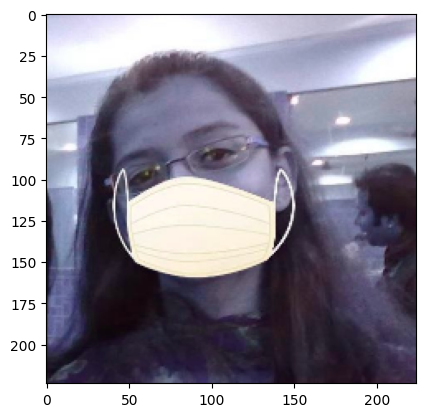

'\n [0] == 1\n [1] == 0\n [2] == 1\n [3] == 1\n.\n.\n.\n.\n[788] == 0\n'

In [6]:
data_labels.columns = data_labels.columns.str.strip()
data_labels["label"] = data_labels['with_mask'].apply(lambda x: 1 if x == 1 else 0)
print(data_labels["label"][0])
plt.imshow(all_images[0])
plt.show()
"""
 [0] == 1
 [1] == 0
 [2] == 1
 [3] == 1
.
.
.
.
[788] == 0
"""

In [ ]:
X = all_images
y = data_labels["label"]
X = np.array(X)
y = np.array(y)

print(X[1])

X = X/255

# print(y)

[[[[183 186 214]
   [185 188 216]
   [187 190 218]
   ...
   [217 212 233]
   [218 213 234]
   [218 213 234]]

  [[188 191 219]
   [189 192 220]
   [189 192 220]
   ...
   [215 210 231]
   [216 211 232]
   [216 211 232]]

  [[190 193 221]
   [191 194 222]
   [191 194 222]
   ...
   [206 201 222]
   [207 202 223]
   [207 202 223]]

  ...

  [[ 36  34  45]
   [ 36  34  45]
   [ 55  54  66]
   ...
   [ 63  46  73]
   [ 62  47  74]
   [ 62  49  75]]

  [[ 41  38  53]
   [ 48  45  61]
   [ 63  59  76]
   ...
   [ 60  43  70]
   [ 64  49  76]
   [ 64  51  78]]

  [[ 35  30  51]
   [ 46  41  63]
   [ 46  40  62]
   ...
   [ 62  45  72]
   [ 59  44  71]
   [ 59  47  72]]]


 [[[148 181 207]
   [150 182 208]
   [153 183 210]
   ...
   [162 163 160]
   [161 162 160]
   [162 161 163]]

  [[149 182 208]
   [150 182 208]
   [154 184 211]
   ...
   [163 162 160]
   [160 158 158]
   [158 155 159]]

  [[149 182 208]
   [150 183 209]
   [155 185 212]
   ...
   [162 158 159]
   [158 154 157]
   [155 150

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# print(X_train.shape, X_test.shape)

In [8]:
vgg = VGG16()
print(vgg.summary())

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

None


In [12]:
from keras import Sequential
model = Sequential()

for layer in vgg.layers[:-1]:
     model.add(layer)
#   print(model.summary())

# make all trainable parameters into non-trainable parameters, means we freaze them 
for layer in model.layers:
    layer.trainable=False
# print(model.summary())

from keras.layers import Dense
model.add(Dense(1, activation='sigmoid'))
# print(model.summary())

In [15]:
model.compile(optimizer='adam',
              loss = 'binary_crossentropy', 
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=6, validation_data=(X_test, y_test))


Epoch 1/6
32/32 ━━━━━━━━━━━━━━━━━━━━ 250s 8s/step - accuracy: 0.6413 - loss: 0.6689 - val_accuracy: 0.8711 - val_loss: 0.4756
Epoch 2/6
32/32 ━━━━━━━━━━━━━━━━━━━━ 240s 8s/step - accuracy: 0.9042 - loss: 0.3887 - val_accuracy: 0.9258 - val_loss: 0.3144
Epoch 3/6
32/32 ━━━━━━━━━━━━━━━━━━━━ 246s 8s/step - accuracy: 0.9238 - loss: 0.2960 - val_accuracy: 0.9492 - val_loss: 0.2521
Epoch 4/6
32/32 ━━━━━━━━━━━━━━━━━━━━ 250s 8s/step - accuracy: 0.9345 - loss: 0.2390 - val_accuracy: 0.9258 - val_loss: 0.2222
Epoch 5/6
32/32 ━━━━━━━━━━━━━━━━━━━━ 262s 8s/step - accuracy: 0.9501 - loss: 0.2142 - val_accuracy: 0.9492 - val_loss: 0.1899
Epoch 6/6
32/32 ━━━━━━━━━━━━━━━━━━━━ 246s 8s/step - accuracy: 0.9501 - loss: 0.1812 - val_accuracy: 0.9570 - val_loss: 0.1712


In [ ]:
# cap = cv2.VideoCapture(0)

# while True:
#     ret, frame = cap.read()
# #   we have to call the detection method

#     cv2.imshow("window", frame)
#     if cv2.waitKey(1) & 0xFF == ord('x'):
#         break

# cv2.destroyAllWindows()

In [16]:
def detect_face_mask(img):
    y_pred = model.predict(img.reshape(1, 224, 224, 3))
    return y_pred[0][0]

In [17]:
sample1 = cv2.imread('sample1.png')
sample = cv2.resize(sample1, (224, 224))
detect_face_mask(sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 741ms/step


np.float32(1.0)

In [18]:
model.save("mask_detector_model.h5")
